## Previsão de Preços de Imóveis

Este é o problema clássico de previsão de imóveis utilizando os modelos de regressão linear.

O intuito deste projeto é apresentar aos gerentes, leads e recrutadores o meu conhecimento sobre a utilização dos modelos de regressão linear do Scikit-Learn

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

### Obtenção de dados

In [2]:
# Carregando os arquivos
dados = pd.read_json(path_or_buf="imoveis.json", orient='columns')

# Visualizando os dados
dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


In [3]:
# Explorar informações
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [4]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

### Tratamento dos dados

In [5]:
# Tratamento de dados

# Normalização
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [6]:
dados_lista2 = pd.json_normalize(dados.listing, sep="_")
dados_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [ ]:
# Junção dos dataframes
dados_imoveis = pd.concat([dados_lista1,dados_lista2], axis=1)

# Visualização das 5 primeiras linhas do dataframe
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [ ]:
# Avaliando a quantidade de linhas e colunas
dados_imoveis.shape

(73615, 21)

In [ ]:
# Criando o laço for para obter o panorama dos dados
for coluna in dados_imoveis.columns:
    print("======="*30)
    print(dados_imoveis[coluna].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

In [ ]:
# Criando o filtro
filtro = (dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] == 'Rio de Janeiro')

# Aplicando o filtro
dados_imoveis = dados_imoveis[filtro]

# Visualizando o dataframe filtrado
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [ ]:
# Avaliando os tipos de variáveis
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [12]:
# Resetar o index
dados_imoveis.reset_index(drop=True, inplace=True)

In [13]:
# Mostrar o RangeIndex
dados_imoveis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [14]:
# Transformar dados do tipo string para numérico
dados_imoveis = dados_imoveis.astype({
    'prices_price':'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64'
})

# Visualizar
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

### Tratamento de dados faltantes

In [15]:
# Dados faltantes
dados_imoveis.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [ ]:
# Preenchendo os dados faltantes com not a numbers
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

In [ ]:
# Verificando os dados faltantes
dados_imoveis.address_zone.isnull().sum()

149

In [ ]:
# Visualizando o dataframe
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [19]:
# Preencher a coluna Address_zone de acordo com o bairro
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [ ]:
# Adicionando bairro para zona
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}

# Printando as zonas
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [ ]:
# Cria o laço for para preencher os dados faltantes de acordo com o bairro
for bairro, zona in dic_zonas.items():
    dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [ ]:
# Verifica se ainda há dados faltantes
dados_imoveis['address_zone'].isnull().sum()

0

In [ ]:
# Dados nulos da coluna "prices"
dados_imoveis.prices_tax_iptu.isnull().sum()

8725

In [ ]:
# Verifica a quantidade de dados faltantes na coluna "tax_condo"
dados_imoveis.prices_tax_condo.isnull().sum()

6061

In [ ]:
# Preenche com 0 os dados faltantes das colunas "tax_condo" e "tax_iptu"
dados_imoveis.prices_tax_iptu.fillna(0, inplace=True)
dados_imoveis.prices_tax_condo.fillna(0, inplace=True)

In [ ]:
# Verifica se há ainda dados faltantes e printa em tela
print(f'Total de prices nulos: {dados_imoveis.prices_tax_iptu.isnull().sum()}')
print(f"Total de prices_tax_condo nulos: {dados_imoveis.prices_tax_condo.isnull().sum()}")

Total de prices nulos: 0
Total de prices_tax_condo nulos: 0


In [27]:
# Eliminando as colunas desnecessárias
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city', 'address_location_lon', 'address_location_lat', 'address_neighborhood'], axis=1, inplace=True)

In [ ]:
# Cria o dicionário para alterar os nomes das colunas
dicionarios_colunas = {'types_unit':'unit', 'address_zone':'zone', 'prices_price': 'price', 'prices_tax_condo': 'tax_condo',
                       'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedroomns', 'features_bathrooms': 'bathrooms',
                       'features_suites' : 'suites', 'features_parkingSpaces': 'parkingSpaces', 'features_usuableAreas':'usuableAres',
                       'features_totalAreas': 'totalAreas', 'features_floors': 'floors', 'features_unitsOnTheFloor': 'unitOnTheFloor', 
                       'features_unitFloors': 'unitFloors'}

# Aplica o rename nas colunas
dados_imoveis = dados_imoveis.rename(dicionarios_colunas, axis=1)

# Visualiza o dataframe para verificar alteração dos nomes das colunas
dados_imoveis.head()


,unit,zone,price,tax_iptu,tax_condo,bedroomns,bathrooms,suites,parkingSpaces,features_usableAreas,totalAreas,floors,unitOnTheFloor,features_unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


### Transformação dos dados

In [ ]:
# Calcula a correlação entre as variáveis
correlacao = dados_imoveis.corr()

# Visualiza a correlação
correlacao

C:\Users\cleri\AppData\Local\Temp\ipykernel_8196\707888969.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_imoveis.corr()


,price,tax_iptu,tax_condo,bedroomns,bathrooms,suites,parkingSpaces,features_usableAreas,totalAreas,floors,unitOnTheFloor,features_unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedroomns,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
features_usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


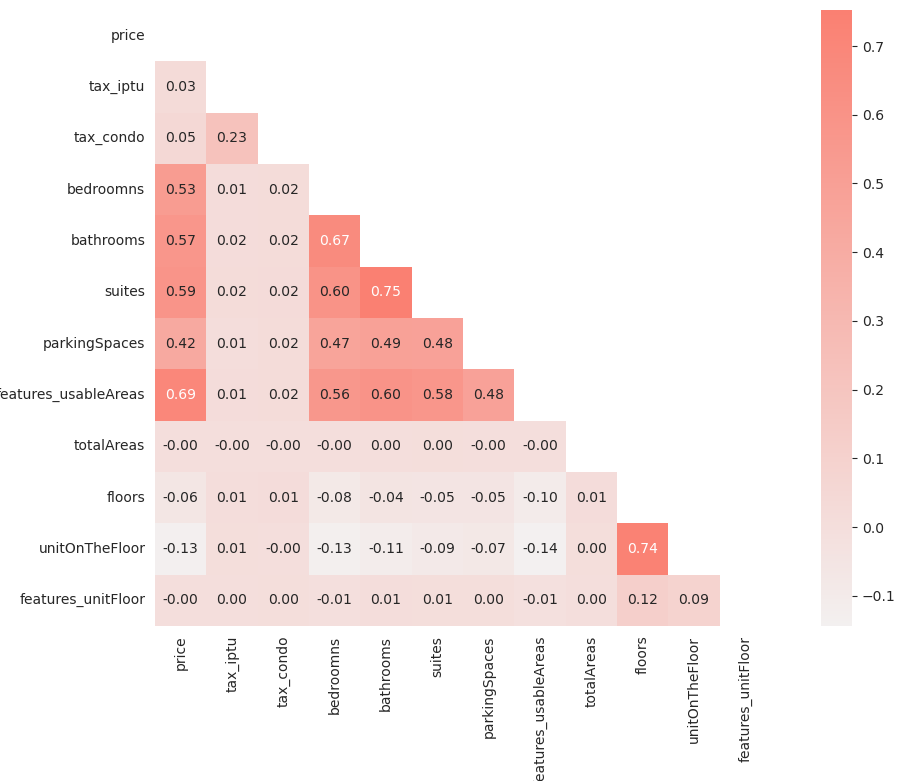

In [ ]:
# importa a biblioteca matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar graficamente a correlação dos dados
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)


Text(0.5, 0, 'Preço')

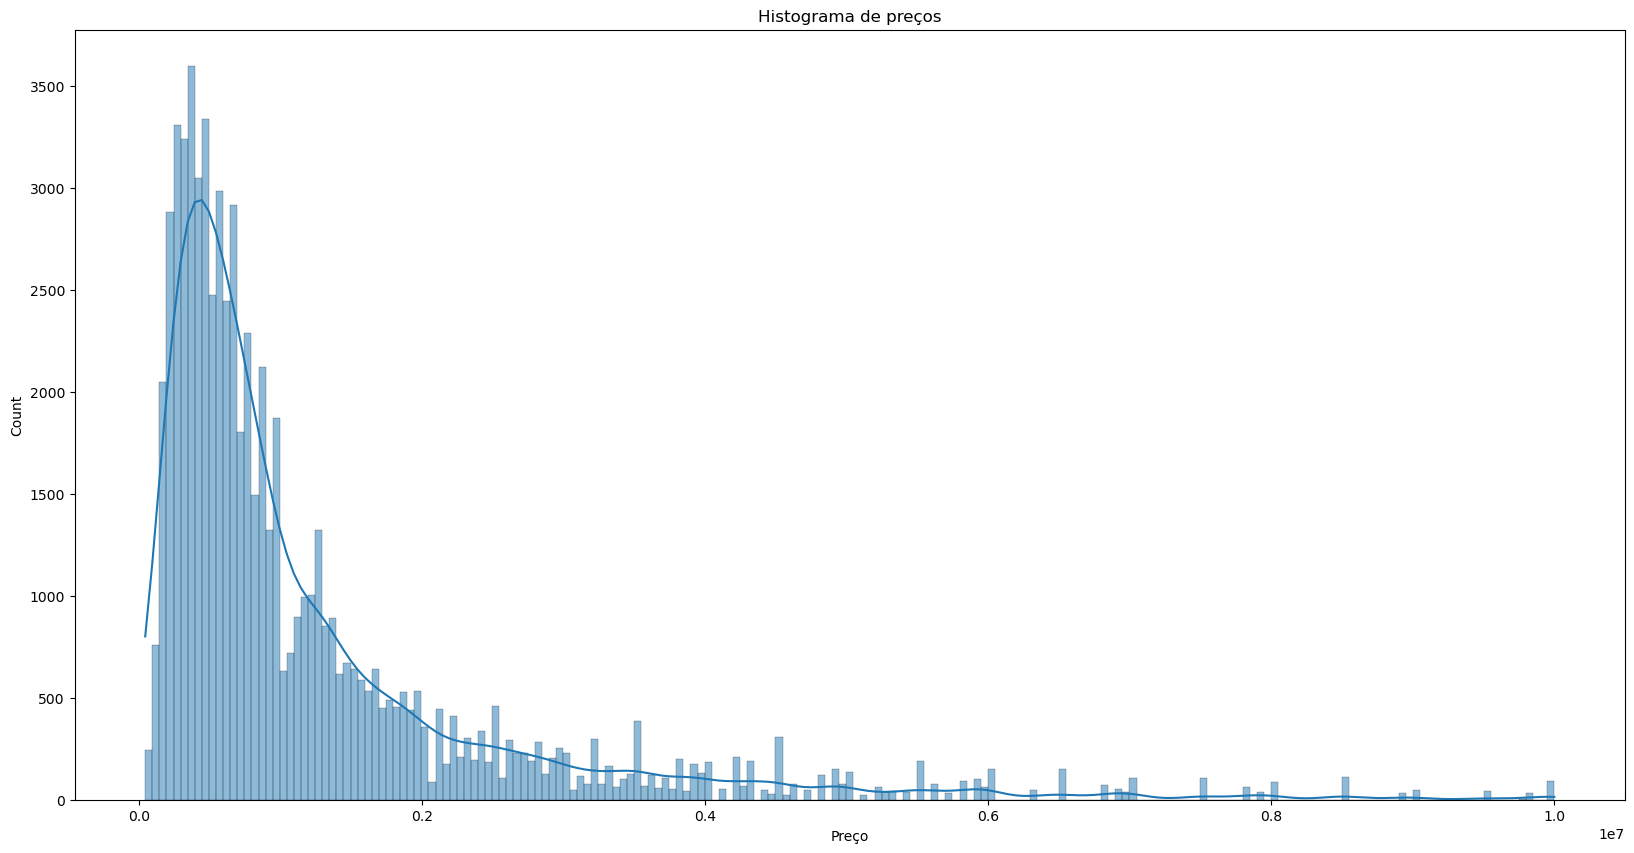

In [ ]:
# Criar um histograma da variável 'price'
ax = sns.histplot(data=dados_imoveis, x='price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

In [ ]:

# Importando a biblioteca
from sklearn.preprocessing import FunctionTransformer

# Instancia o modelo de transformação
transformer = FunctionTransformer(np.log1p, validate=True)

# Selecionando colunas numéricas e transformando
dados_transformados = transformer.fit_transform(dados_imoveis.select_dtypes(exclude=['object']))

# Pegando os nomes das colunas transformadas
colunas_dados_transformados = dados_imoveis.select_dtypes(exclude=['object']).columns

# Criando o DataFrame transformado
df_transformado = pd.concat([
    dados_imoveis.select_dtypes(include=['object']).reset_index(drop=True),
    pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)
], axis=1)
# Visualizando o dataframe
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedroomns,bathrooms,suites,parkingSpaces,features_usableAreas,totalAreas,floors,unitOnTheFloor,features_unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


C:\Users\cleri\AppData\Local\Temp\ipykernel_8196\502533426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_transformado = df_transformado.corr()


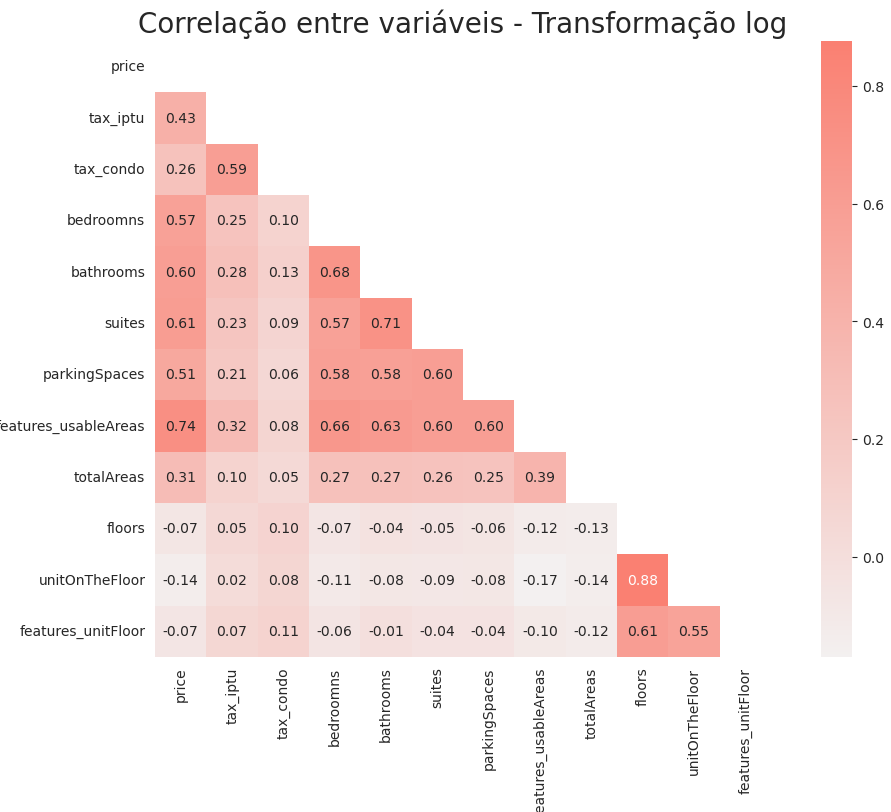

In [ ]:
# Calcular a correlação dos dados transformados
correlacao_transformado = df_transformado.corr()

# Visualizar graficamente a correlação através do mapa de calor
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Transformação log', fontsize=20)

Text(0.5, 0, 'Preço')

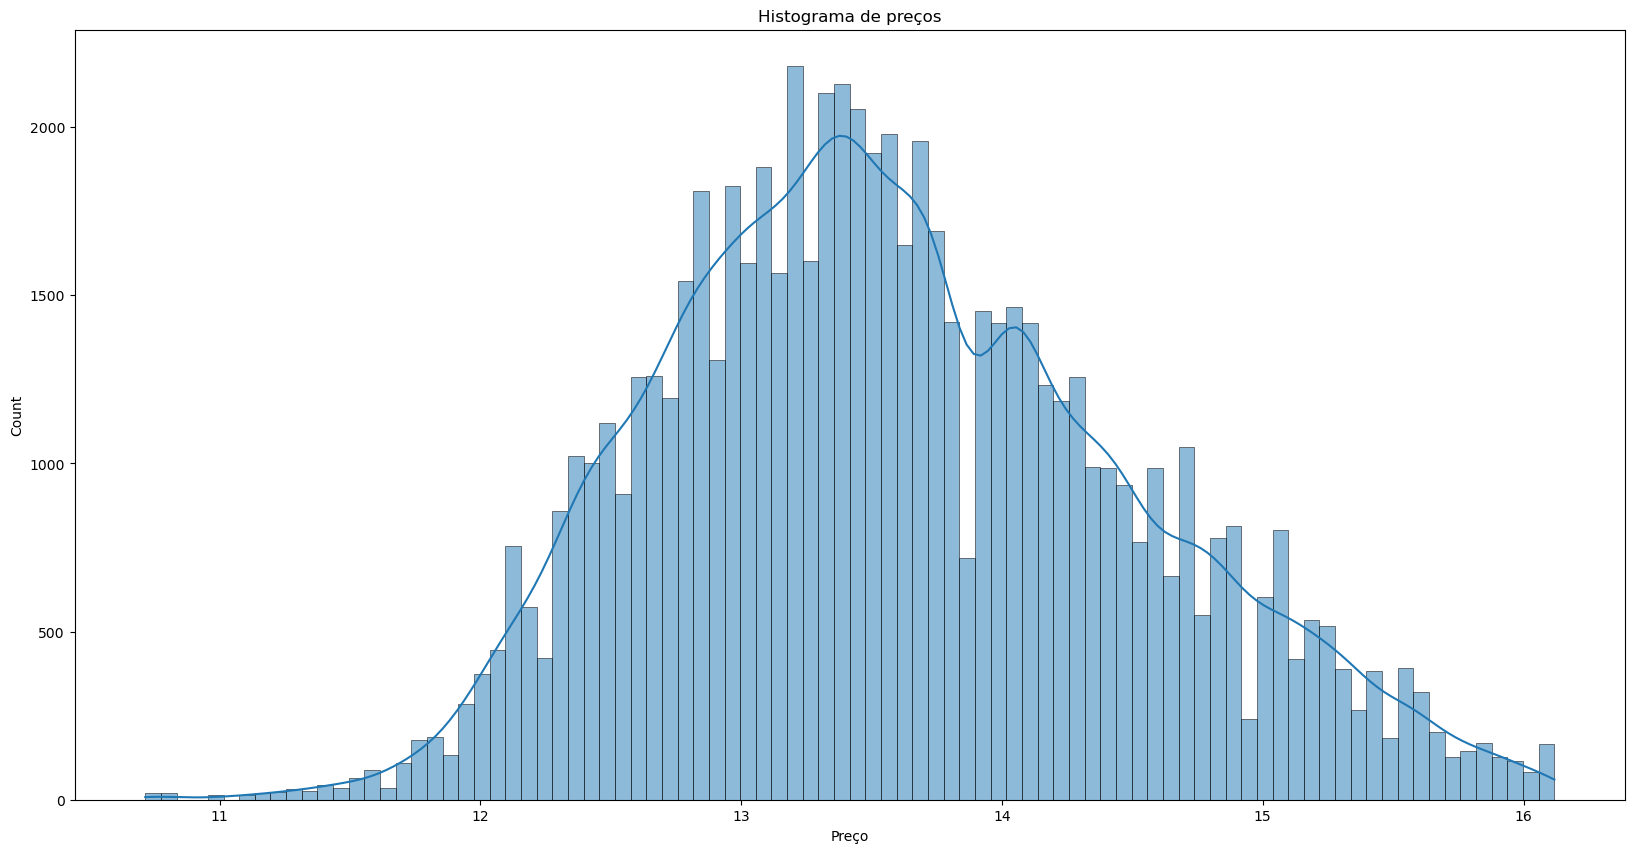

In [ ]:
# Criar um histograma dos dados transformados
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

### Dummies

In [ ]:
# Obtendo as colunas categóricas
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

# Visualizar as colunas categóricas
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [ ]:
# Aplicar o dummies para as colunas categóricas
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])

# Visualizar o dataframe dos dados categóricos
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [ ]:
# Eliminando as colunas categóricas do dataframe anterior e contatenando com o dataframe com os dados categóricos transformados
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)

# Visualizando o dataframe com os dados categóricos transformados
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedroomns,bathrooms,suites,parkingSpaces,features_usableAreas,totalAreas,floors,unitOnTheFloor,features_unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


### Divisão de dados

In [ ]:
# Divisão de dados

# Variáveis independentes
X = dados_imoveis_dummies.drop('price', axis=1)

# vAriável dependente
y = dados_imoveis_dummies['price']

In [ ]:
# Divisão de dados de treino e teste

# Importando a bibloteca
from sklearn.model_selection import train_test_split

# Dividindo os dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

### Regressão Linear

In [ ]:
# importando a biblioteca LinearRegression do Scikit-Learn
from sklearn.linear_model import LinearRegression

# Instanciando o modelo
lr = LinearRegression()

In [ ]:
# Treino
lr.fit(X_treino,y_treino)

LinearRegression()

In [44]:
# Teste
previsao_lr = lr.predict(X_teste)

In [45]:
# Resultados da previsão
previsao_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [46]:
# Transformação inversa
np.expm1(13.25768024)

572448.7513552749

In [ ]:
# Métricas de desempenho

# Importando a biblioteca
from sklearn.metrics import r2_score

# Cálculo da métrica 
r2_lr = r2_score(y_teste, previsao_lr)

# Visualizando o resultado
r2_lr

0.7880682093407632

### Decision Tree

In [ ]:
# Importando a biblioteca
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Instanciando o modelo 
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [51]:
# Treino
dtr.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [52]:
# Teste
previsao_dtr = dtr.predict(X_teste)

In [53]:
# Visualizar a previsão
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

In [ ]:
# Métricas

# Aplicando a métrica
r2_dtr = r2_score(y_teste,previsao_dtr)

# Visualizando o resultado
r2_dtr

0.7846916218477392

### Random Forest

In [ ]:
# Importando a biblioteca
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Instanciar o modelo
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [ ]:
# Treino
rf.fit(X_treino,y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [63]:
# Teste
previsao_rf = rf.predict(X_teste)

In [64]:
# Visualizar
previsao_rf

array([13.53707348, 12.34106458, 13.15366323, ..., 13.23975692,
       12.34106458, 14.6148927 ])

In [ ]:
# Métricas

# Aplicar a métrica
r2_rf = r2_score(y_teste,previsao_rf)

# Visualizar a métrica
r2_rf

0.805273364453047

### Cross-Validation

In [ ]:
# Importando a biblioteca
from sklearn.model_selection import KFold

# Divisão do dataset em 5 pedaços
# definindo o k - número de subconjuntos
cv = KFold(n_splits=5, shuffle=True)

In [ ]:
# importando a biblioteca
from sklearn.model_selection import cross_val_score

### Para Árvore de Decisão

In [ ]:
# Para Arvore de Decisão

# Aplicação do cross-validation para Decision Tree
desempenho_cross_val_r2 = cross_val_score(estimator=dtr, X=X_treino, y=y_treino, scoring='r2', cv=cv)

# Printando o desempenho
print("Desempenho médio de r2: {}".format(round(desempenho_cross_val_r2.mean(),3)))

Desempenho médio de r2: 0.782


#### Random Search Validação

In [74]:
# Seleção de hiperparâmetros
param_random_dt = {
    'criterion':['squared_error','absolute_error'],
    'max_depth':[6,8,10,12,14,16],
    'min_samples_leaf': [6,8,10],
    'min_samples_split':[8,10,12,14,16],
    'max_features':['sqrt','log2','auto']
}

In [ ]:
# Importando a biblioteca
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definindo parametros
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [ ]:
# Treino
randomcv_dtr = random_cv_dt.fit(X_treino,y_treino)

In [ ]:
# Visualização dos resultados através do dataframe
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,23.712960,0.249984,0.008804,0.003623,16,10,log2,6,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.701895,0.733312,0.713365,0.712996,0.697938,0.711901,0.012303,4
1,0.142885,0.008161,0.008488,0.000811,8,6,log2,14,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.845997,0.843068,0.844255,0.847901,0.844903,0.845225,0.001640,1
2,23.484148,0.236420,0.005101,0.003259,8,6,log2,6,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.700939,0.733128,0.704952,0.713205,0.698572,0.710159,0.012516,5
3,24.784571,0.376845,0.005970,0.003633,8,10,log2,10,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.808241,0.817482,0.819509,0.821238,0.820537,0.817401,0.004752,3
4,16.851172,3.740135,0.004532,0.003303,8,10,log2,14,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.832925,0.823744,0.835270,0.839227,0.825688,0.831371,0.005828,2


In [ ]:
# Apresentando os melhores parâmetros
randomcv_dtr.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [ ]:
# Apresentando o melhor score
randomcv_dtr.best_score_

0.8452247119990204

In [ ]:
# Passando os melhores parâmetros no modelo de Árvore de Decisão
dtr_otimizado = DecisionTreeRegressor(criterion='squared_error' , max_depth=14 , max_features= 'log2', min_samples_leaf=6, min_samples_split=8)

In [84]:
# Treino
dtr_otimizado.fit(X_treino,y_treino)

DecisionTreeRegressor(max_depth=14, max_features='log2', min_samples_leaf=6,
                      min_samples_split=8)

In [85]:
# Teste
predicao_dtr_otimizado = dtr_otimizado.predict(X_teste)

In [ ]:
# Visualização das métricas
r2_score(y_teste,predicao_dtr_otimizado)

0.8422002227261132

## para Random Forest

### Cross-Validation

In [ ]:
# Aplicando o cross-validation
desempenho_rf_cross_val_r2 = cross_val_score(estimator=rf, X=X_treino, y=y_treino, scoring='r2', cv=cv)

# Visualizando o desempenho
print('Desempenho de r2: {}'.format(round(desempenho_rf_cross_val_r2.mean(),3)))

Desempenho de r2: 0.799


### Random Search Validação

In [ ]:
# Definindo os parâmetros
param_random_rf = {
    'n_estimators': [150,200],
    'max_depth': [20,30],
    'min_samples_split': [8,10],
    'min_samples_leaf':[3]
}

In [ ]:
# Instanciando o modelo com os parâmetros
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Treino
rf_randomcv = random_cv_rf.fit(X_treino,y_treino)

In [ ]:
# Visualização dos resultados
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,75.311025,6.561105,0.968959,0.136502,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.894697,0.896519,0.887984,0.898819,0.896490,0.894902,0.003698,2
1,74.730319,6.116303,0.946716,0.190025,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.894728,0.896585,0.887946,0.898840,0.896567,0.894933,0.003729,1
2,55.699708,4.525942,0.811146,0.170767,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.894507,0.896482,0.887883,0.898730,0.896468,0.894814,0.003715,3
3,63.476750,5.996502,0.660381,0.123478,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.894355,0.896220,0.887658,0.898595,0.896157,0.894597,0.003722,4
4,43.549463,0.920836,0.418213,0.004307,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.894145,0.896025,0.887529,0.898473,0.896039,0.894442,0.003720,5


In [ ]:
# Visualizando os melhores parâmetros
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [ ]:
# Visualizando o melhor score
rf_randomcv.best_score_

0.8949333250521846

In [ ]:
# Aplicando os parâmetros encontrados no modelo
rf_otimizado = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200 , min_samples_leaf=3, min_samples_split=8)

In [ ]:
# treino
rf_otimizado.fit(X_treino,y_treino)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [ ]:
# previsão
predicao_rf_otimizado = rf_otimizado.predict(X_teste)

In [ ]:
# Métrica
r2_score(y_teste, predicao_rf_otimizado)

0.8950454342187095

### Escolhendo o modelo

In [107]:
# Tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % r2_score(y_teste,predicao_dtr_otimizado))
print('Floresta Aleatória: %f' % r2_score(y_teste,predicao_rf_otimizado))
print("*"*30)

print('Cross Validation')
print("="*30)
print('Arvore de Decisão: %f' % round(desempenho_cross_val_r2.mean(),3))
print('Floresta Aleatória: %f' % round(desempenho_rf_cross_val_r2.mean(),3))

Random Search
Árvore de Decisão: 0.842200
Floresta Aleatória: 0.895045
******************************
Cross Validation
Arvore de Decisão: 0.782000
Floresta Aleatória: 0.799000


In [115]:
# Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4.6],'tax_condo':[5.45], 'bedroomns':[2], 'bathrooms': [1], 'suites':[1], 'parkingSpaces':[1], 'features_usableAreas': [4], 'totalAreas':[4.68], 'floors':[0], 'unitOnTheFloor':[0], 'features_unitFloor':[0], 'unit_Apartamento':[0], 'unit_Casa':[1], 'unit_Outros':[0], 'zone_Zona Central':[0], 'zone_Zona Norte':[0], 'zone_Zona Oeste':[1], 'zone_Zona Sul':[0]})
cliente_joana

,tax_iptu,tax_condo,bedroomns,bathrooms,suites,parkingSpaces,features_usableAreas,totalAreas,floors,unitOnTheFloor,features_unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Verificando resultados
predicao_cliente_joana = rf_otimizado.predict(cliente_joana)

# Aplicando a transformação inversa
np.expm1(predicao_cliente_joana)

array([284216.62604224])